In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from models.logistic_regression import LogisticRegression
from helper.metrics import accuracy, confusion_matrix, precision, recall, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
le = LabelEncoder()
scaler = StandardScaler()

cat_col = ["Gender"]
num_col = ["Age", "AnnualSalary"]

for col in cat_col:
    df[col] = le.fit_transform(df[col])

for col in num_col:
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1, 1))

In [4]:
X, y = df.drop(["User ID", "Purchased"], axis=1).to_numpy(), df["Purchased"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 81.50%
Precision: 88.06%
Recall: 67.05%
F1 Score: 76.13%
Confusion Matrix:
 [[ 59   8]
 [ 29 104]]
ROC AUC Score: 79.95%


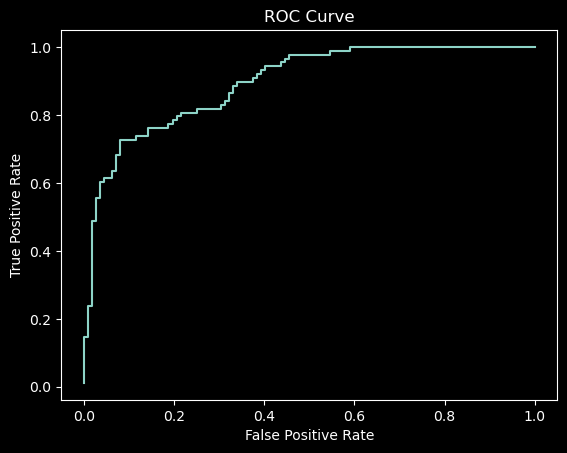

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def estimate_binary_classifier(y_true, y_pred):
    print("Accuracy: {:.2f}%".format(accuracy(y_true, y_pred) * 100))
    print("Precision: {:.2f}%".format(precision(y_true, y_pred) * 100))
    print("Recall: {:.2f}%".format(recall(y_true, y_pred) * 100))
    print("F1 Score: {:.2f}%".format(f1_score(y_true, y_pred) * 100))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("ROC AUC Score: {:.2f}%".format(roc_auc_score(y_true, y_pred) * 100))
    
estimate_binary_classifier(y_test, y_pred)

probs = model.predict_proba(X_test)
x, y, _ = roc_curve(y_test, probs)

def plot_roc_curve(x, y):
    plt.plot(x, y)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    
plot_roc_curve(x, y)